In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import special

In [3]:
df = pd.read_csv('../data/WikiQA.tsv', sep="\t")
df.head(20)

,QuestionID,Question,DocumentID,DocumentTitle,SentenceID,Sentence,Label
0,Q0,HOW AFRICAN AMERICANS WERE IMMIGRATED TO THE US,D0,African immigration to the United States,D0-0,African immigration to the United States refer...,0
1,Q0,HOW AFRICAN AMERICANS WERE IMMIGRATED TO THE US,D0,African immigration to the United States,D0-1,The term African in the scope of this article ...,0
2,Q0,HOW AFRICAN AMERICANS WERE IMMIGRATED TO THE US,D0,African immigration to the United States,D0-2,From the Immigration and Nationality Act of 19...,0
3,Q0,HOW AFRICAN AMERICANS WERE IMMIGRATED TO THE US,D0,African immigration to the United States,D0-3,African immigrants in the United States come f...,0
4,Q0,HOW AFRICAN AMERICANS WERE IMMIGRATED TO THE US,D0,African immigration to the United States,D0-4,"They include people from different national, l...",0
5,Q0,HOW AFRICAN AMERICANS WERE IMMIGRATED TO THE US,D0,African immigration to the United States,D0-5,"As such, African immigrants are to be distingu...",1
6,Q1,how are glacier caves formed?,D1,Glacier cave,D1-0,A partly submerged glacier cave on Perito More...,0
7,Q1,how are glacier caves formed?,D1,Glacier cave,D1-1,The ice facade is approximately 60 m high,0
8,Q1,how are glacier caves formed?,D1,Glacier cave,D1-2,Ice formations in the Titlis glacier cave,0
9,Q1,how are glacier caves formed?,D1,Glacier cave,D1-3,A glacier cave is a cave formed within the ice...,1


In [4]:
def select_doc_titles(df, titles):
    '''
    Parameters:
        df - pandas dataframe from which we are selecting the columns from
        titles - an np array of document titles to select
    Returns:
        Pandas Dataframe of only desired document titles
    '''
    series = []
    for i in range(0, len(titles)):
        series.append(df[df['DocumentTitle'] == titles[i]].reset_index())

    return pd.concat(series).reset_index()

In [5]:
titles = ['Pancreatic cancer',
          'Pharmaceutical industry',
          'Variable universal life insurance',
          'Sebaceous cyst',
          'Chronic obstructive pulmonary disease',
          'Brain tumor',
          'Cardiovascular disease',
          'Plateletpheresis']

In [6]:
sample_df = select_doc_titles(df, titles)

In [7]:
sample_df.head()

,level_0,index,QuestionID,Question,DocumentID,DocumentTitle,SentenceID,Sentence,Label
0,0,1469,Q138,how does one get pancreatic cancer,D138,Pancreatic cancer,D138-0,Pancreatic cancer is a malignant neoplasm orig...,0
1,1,1470,Q138,how does one get pancreatic cancer,D138,Pancreatic cancer,D138-1,"The most common type of pancreatic cancer , ac...",0
2,2,1471,Q138,how does one get pancreatic cancer,D138,Pancreatic cancer,D138-2,"A minority arise from islet cells , and are cl...",0
3,3,1472,Q138,how does one get pancreatic cancer,D138,Pancreatic cancer,D138-3,The signs and symptoms that eventually lead to...,0
4,4,1473,Q138,how does one get pancreatic cancer,D138,Pancreatic cancer,D138-4,Pancreatic cancer is the fourth most common ca...,0


In [8]:
sample_df['Question'].head()

0    how does one get pancreatic cancer
1    how does one get pancreatic cancer
2    how does one get pancreatic cancer
3    how does one get pancreatic cancer
4    how does one get pancreatic cancer
Name: Question, dtype: object

In [9]:
sample_df = sample_df.drop(columns=['level_0', 'index', 'QuestionID', 'DocumentID', 'SentenceID'])

In [10]:
sample_df.head()

,Question,DocumentTitle,Sentence,Label
0,how does one get pancreatic cancer,Pancreatic cancer,Pancreatic cancer is a malignant neoplasm orig...,0
1,how does one get pancreatic cancer,Pancreatic cancer,"The most common type of pancreatic cancer , ac...",0
2,how does one get pancreatic cancer,Pancreatic cancer,"A minority arise from islet cells , and are cl...",0
3,how does one get pancreatic cancer,Pancreatic cancer,The signs and symptoms that eventually lead to...,0
4,how does one get pancreatic cancer,Pancreatic cancer,Pancreatic cancer is the fourth most common ca...,0


In [11]:
val_count = sample_df['DocumentTitle'].value_counts()

In [12]:
print("Number of answers for each Question Type:\n{}".format(val_count))

Number of answers for each Question Type:
Variable universal life insurance        14
Brain tumor                              12
Chronic obstructive pulmonary disease    11
Cardiovascular disease                    8
Pancreatic cancer                         7
Sebaceous cyst                            6
Pharmaceutical industry                   5
Plateletpheresis                          4
Name: DocumentTitle, dtype: int64


In [24]:
print(val_count[0])
print(val_count[1])
print(val_count.index)
end = len(val_count.index)
end

14
12
Index(['Variable universal life insurance', 'Brain tumor',
       'Chronic obstructive pulmonary disease', 'Cardiovascular disease',
       'Pancreatic cancer', 'Sebaceous cyst', 'Pharmaceutical industry',
       'Plateletpheresis'],
      dtype='object')


8

[0 1 2 3 4 5 6 7]


/home/jarid/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in power
  # Remove the CWD from sys.path while we load stuff.
/home/jarid/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


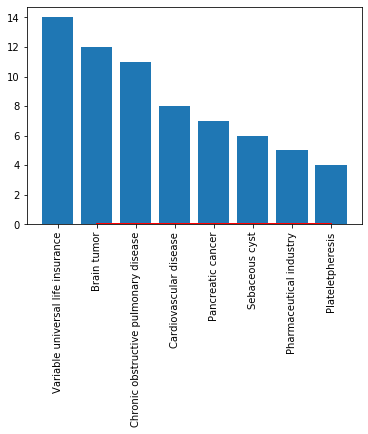

In [38]:
ax, fig = plt.subplots(1,1)
plt.bar(range(len(val_count.index)), height=val_count)
plt.xticks(range(len(val_count.index)), val_count.index, rotation='vertical')

#define zipf distribution parameter. Has to be >1
a = 2.
end = len(val_count.index)
x = np.array(range(end))
print(x)
y = (x)**(-a) / special.zetac(a)
plt.plot(x, y/max(y), linewidth=2, color='r')

In [57]:
top_5 = val_count.index[:5]
top_5

Index(['Variable universal life insurance', 'Brain tumor',
       'Chronic obstructive pulmonary disease', 'Cardiovascular disease',
       'Pancreatic cancer'],
      dtype='object')

In [58]:
def get_all_answers(df, category):
    return df[df['DocumentTitle'] == category].reset_index()

In [59]:
cd_df = get_all_answers(sample_df, 'Cardiovascular disease')
cd_df['words'] = cd_df['Sentence'].str.strip().str.split('[\W_]+')

In [60]:
cd_df.head()

,index,Question,DocumentTitle,Sentence,Label,words
0,55,what causes heart disease,Cardiovascular disease,Cardiovascular disease (also called heart dise...,0,"[Cardiovascular, disease, also, called, heart,..."
1,56,what causes heart disease,Cardiovascular disease,Cardiovascular disease refers to any disease t...,0,"[Cardiovascular, disease, refers, to, any, dis..."
2,57,what causes heart disease,Cardiovascular disease,The causes of cardiovascular disease are diver...,1,"[The, causes, of, cardiovascular, disease, are..."
3,58,what causes heart disease,Cardiovascular disease,"Additionally, with aging come a number of phys...",0,"[Additionally, with, aging, come, a, number, o..."
4,59,what causes heart disease,Cardiovascular disease,Cardiovascular disease is the leading cause of...,0,"[Cardiovascular, disease, is, the, leading, ca..."


In [61]:
rows = list()
for row in cd_df[['Question', 'words']].iterrows():
    r = row[1]
    for word in r.words:
        rows.append((r['Question'], word))

words = pd.DataFrame(rows, columns=['Question', 'word'])
words.head()


,Question,word
0,what causes heart disease,Cardiovascular
1,what causes heart disease,disease
2,what causes heart disease,also
3,what causes heart disease,called
4,what causes heart disease,heart


In [62]:
sample_df['words'] = sample_df['Sentence'].str.strip().str.split('[\W_]+')
sample_df.head()

,Question,DocumentTitle,Sentence,Label,words
0,how does one get pancreatic cancer,Pancreatic cancer,Pancreatic cancer is a malignant neoplasm orig...,0,"[Pancreatic, cancer, is, a, malignant, neoplas..."
1,how does one get pancreatic cancer,Pancreatic cancer,"The most common type of pancreatic cancer , ac...",0,"[The, most, common, type, of, pancreatic, canc..."
2,how does one get pancreatic cancer,Pancreatic cancer,"A minority arise from islet cells , and are cl...",0,"[A, minority, arise, from, islet, cells, and, ..."
3,how does one get pancreatic cancer,Pancreatic cancer,The signs and symptoms that eventually lead to...,0,"[The, signs, and, symptoms, that, eventually, ..."
4,how does one get pancreatic cancer,Pancreatic cancer,Pancreatic cancer is the fourth most common ca...,0,"[Pancreatic, cancer, is, the, fourth, most, co..."


In [63]:
rows = list()
for row in sample_df[['Question', 'words']].iterrows():
    r = row[1]
    for word in r.words:
        rows.append((r['Question'], word))

words = pd.DataFrame(rows, columns=['Question', 'word'])
words.head()

,Question,word
0,how does one get pancreatic cancer,Pancreatic
1,how does one get pancreatic cancer,cancer
2,how does one get pancreatic cancer,is
3,how does one get pancreatic cancer,a
4,how does one get pancreatic cancer,malignant


In [64]:
words = words[words.word.str.len() > 0]
words.head()

,Question,word
0,how does one get pancreatic cancer,Pancreatic
1,how does one get pancreatic cancer,cancer
2,how does one get pancreatic cancer,is
3,how does one get pancreatic cancer,a
4,how does one get pancreatic cancer,malignant


In [65]:
words['word'] = words.word.str.lower()
words.head()

,Question,word
0,how does one get pancreatic cancer,pancreatic
1,how does one get pancreatic cancer,cancer
2,how does one get pancreatic cancer,is
3,how does one get pancreatic cancer,a
4,how does one get pancreatic cancer,malignant


In [66]:
counts = words.groupby('Question')\
    .word.value_counts()\
    .to_frame()\
    .rename(columns={'word':'n_w'})
counts

n_w
Question                  word              
how a vul works           the             39
                          in              15
                          of              15
                          to              15
                          life            14
                          a               12
                          is              12
                          whole            9
                          insurance        8
                          policy           8
                          value            7
                          cash             6
                          death            6
                          that             6
                          accounts         5
                          and              5
                          benefit          5
                          paid             5
                          separate         5
                          which            5
                          age              4
                          be               4
                          endowment        4
                          if               4
                          or               4
                          over             4
                          premium          4
                          this             4
                          up               4
                          vul              4
...                                      ...
what causes heart disease necessary        1
                          notably          1
                          number           1
                          older            1
                          on               1
                          peripheral       1
                          physiological    1
                          preventing       1
                          prevention       1
                          primary          1
                          principally      1
                          rate             1
                          rates            1
                          refers           1
                          same             1
                          since            1
                          smoking          1
                          subsequently     1
                          such             1
                          system           1
                          there            1
                          therefore        1
                          though           1
                          time             1
                          usually          1
                          vascular         1
                          veins            1
                          vessels          1
                          with             1
                          worldwide        1

[896 rows x 1 columns]

n_w
Question                                           word               
how a vul works                                    the              39
                                                   in               15
                                                   of               15
                                                   to               15
                                                   life             14
how active can one be with copd                    the              12
                                                   in               11
                                                   of                9
                                                   and               7
                                                   copd              7
how big do sebaceous cysts get                     as                6
                                                   cyst              6
                                                   a                 5
                                                   cysts             5
                                                   the               5
how deadly are brain tumors                        the              25
                                                   in               15
                                                   brain            14
                                                   of               12
                                                   or                9
how does one get pancreatic cancer                 the              18
                                                   and              12
                                                   of                7
                                                   is                6
                                                   cancer            5
how many consumers of pharmaceuticals              and               7
                                                   the               5
                                                   of                3
                                                   pharmaceutical    3
                                                   are               2
how much will a transfusion of platelet apheres... the               7
                                                   in                5
                                                   blood             4
                                                   of                4
                                                   platelet          4
what causes heart disease                          disease          12
                                                   cardiovascular   11
                                                   and               9
                                                   the               9
                                                   of                8

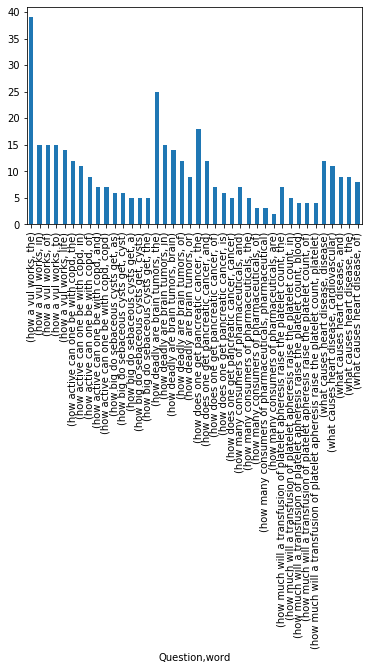

In [67]:
def pretty_plot_top_n(series, top_n=5, index_level=0):
    r = series\
    .groupby(level=index_level)\
    .nlargest(top_n)\
    .reset_index(level=index_level, drop=True)
    r.plot.bar()
    return r.to_frame()

pretty_plot_top_n(counts['n_w'])

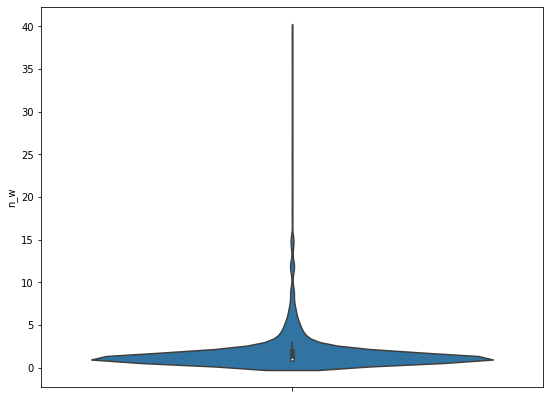

In [68]:
fig, ax = plt.subplots(figsize =(9, 7)) 
sns.violinplot(ax = ax,  y = counts["n_w"] ) 

In [76]:
type(counts)

pandas.core.frame.DataFrame

In [70]:
import nltk
from nltk.corpus import stopwords

In [71]:
stop = stopwords.words('english')

In [72]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [83]:
counts.columns

Index(['n_w'], dtype='object')

In [87]:
words.head(20)

,Question,word
0,how does one get pancreatic cancer,pancreatic
1,how does one get pancreatic cancer,cancer
2,how does one get pancreatic cancer,is
3,how does one get pancreatic cancer,a
4,how does one get pancreatic cancer,malignant
5,how does one get pancreatic cancer,neoplasm
6,how does one get pancreatic cancer,originating
7,how does one get pancreatic cancer,from
8,how does one get pancreatic cancer,transformed
9,how does one get pancreatic cancer,cells


In [92]:
def check_existence(elem, lst):
    isIn = elem in lst
    return isIn

In [102]:
words['word'] = words['word'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)])).to_frame()

In [103]:
words.head()

,Question,word
0,how does one get pancreatic cancer,pancreatic
1,how does one get pancreatic cancer,cancer
2,how does one get pancreatic cancer,
3,how does one get pancreatic cancer,
4,how does one get pancreatic cancer,malignant
